In [1]:
pip install yahoofinancials

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Just explore data and plot stuff

In [3]:
# https://www.kaggle.com/datasets/hanseopark/sp-500-stocks-value-with-financial-statement/data
sp_500_value_df = pd.read_csv('data/data_origin/FS_sp500_Value.csv')
sp_500_value_df

,Unnamed: 0,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
0,0,A,2010-01-04,22.625179,22.267525,22.453505,22.389128,3815561,20.402897
1,1,A,2010-01-05,22.331903,22.002861,22.324751,22.145924,4186031,20.181271
2,2,A,2010-01-06,22.174536,22.002861,22.067240,22.067240,3243779,20.109568
3,3,A,2010-01-07,22.045780,21.816881,22.017166,22.038628,3095172,20.083494
4,4,A,2010-01-08,22.067240,21.745352,21.917025,22.031473,3733918,20.076973
...,...,...,...,...,...,...,...,...,...
1491166,1491166,ZTS,2022-04-08,201.320007,197.589996,197.789993,200.089996,2455500,200.089996
1491167,1491167,ZTS,2022-04-11,199.880005,192.009995,198.970001,192.500000,2252200,192.500000
1491168,1491168,ZTS,2022-04-12,193.309998,187.149994,192.110001,187.910004,1746500,187.910004
1491169,1491169,ZTS,2022-04-13,190.070007,186.050003,187.990005,189.520004,1517800,189.520004


In [4]:
quotes_df = sp_500_value_df.copy()
# https://help.yahoo.com/kb/SLN28256.html?guccounter=1&guce_referrer=aHR0cHM6Ly9kdWNrZHVja2dvLmNvbS8&guce_referrer_sig=AQAAABw1UgSojKYbBVS16veig-jfSWgltQPLzZS1NhMnpaG-4Jr8_DTehrH45Kk41Hkl1vNPKHke0ZLJzHxc3n0qQBuqsuOwJzHqIzcg454wD6LS_wn3PSvw7lZyHICP54Ba9zGByfIF2AOgpcDhc62_tKDGTFOKA8MWvmtBaZPkHEUn
quotes_df['Adjustment multiplier'] =  quotes_df['Adj Close'] / quotes_df['Close']
quotes_df

,Unnamed: 0,Ticker,Date,High,Low,Open,Close,Volume,Adj Close,Adjustment multiplier
0,0,A,2010-01-04,22.625179,22.267525,22.453505,22.389128,3815561,20.402897,0.911286
1,1,A,2010-01-05,22.331903,22.002861,22.324751,22.145924,4186031,20.181271,0.911286
2,2,A,2010-01-06,22.174536,22.002861,22.067240,22.067240,3243779,20.109568,0.911286
3,3,A,2010-01-07,22.045780,21.816881,22.017166,22.038628,3095172,20.083494,0.911286
4,4,A,2010-01-08,22.067240,21.745352,21.917025,22.031473,3733918,20.076973,0.911286
...,...,...,...,...,...,...,...,...,...,...
1491166,1491166,ZTS,2022-04-08,201.320007,197.589996,197.789993,200.089996,2455500,200.089996,1.000000
1491167,1491167,ZTS,2022-04-11,199.880005,192.009995,198.970001,192.500000,2252200,192.500000,1.000000
1491168,1491168,ZTS,2022-04-12,193.309998,187.149994,192.110001,187.910004,1746500,187.910004,1.000000
1491169,1491169,ZTS,2022-04-13,190.070007,186.050003,187.990005,189.520004,1517800,189.520004,1.000000


In [5]:
quotes_df['Adj high'] = quotes_df['High'] * quotes_df['Adjustment multiplier']
quotes_df['Adj low'] = quotes_df['Low'] * quotes_df['Adjustment multiplier']
quotes_df['Adj Open'] = quotes_df['Open'] * quotes_df['Adjustment multiplier']
quotes_df

,Unnamed: 0,Ticker,Date,High,Low,Open,Close,Volume,Adj Close,Adjustment multiplier,Adj high,Adj low,Adj Open
0,0,A,2010-01-04,22.625179,22.267525,22.453505,22.389128,3815561,20.402897,0.911286,20.618007,20.292082,20.461563
1,1,A,2010-01-05,22.331903,22.002861,22.324751,22.145924,4186031,20.181271,0.911286,20.350751,20.050900,20.344233
2,2,A,2010-01-06,22.174536,22.002861,22.067240,22.067240,3243779,20.109568,0.911286,20.207345,20.050900,20.109568
3,3,A,2010-01-07,22.045780,21.816881,22.017166,22.038628,3095172,20.083494,0.911286,20.090012,19.881420,20.063937
4,4,A,2010-01-08,22.067240,21.745352,21.917025,22.031473,3733918,20.076973,0.911286,20.109567,19.816235,19.972678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491166,1491166,ZTS,2022-04-08,201.320007,197.589996,197.789993,200.089996,2455500,200.089996,1.000000,201.320007,197.589996,197.789993
1491167,1491167,ZTS,2022-04-11,199.880005,192.009995,198.970001,192.500000,2252200,192.500000,1.000000,199.880005,192.009995,198.970001
1491168,1491168,ZTS,2022-04-12,193.309998,187.149994,192.110001,187.910004,1746500,187.910004,1.000000,193.309998,187.149994,192.110001
1491169,1491169,ZTS,2022-04-13,190.070007,186.050003,187.990005,189.520004,1517800,189.520004,1.000000,190.070007,186.050003,187.990005


In [6]:
tickers = pd.Series(quotes_df['Ticker'].unique())
random_10_tickers = tickers.sample(10)
random_10_tickers

347    ODFL
317    MSFT
249     ITW
267      KO
467     VFC
357    PAYX
28     AMCR
257     JPM
363     PFE
108     COF
dtype: object

In [7]:
random_10_companies = quotes_df[quotes_df['Ticker'].isin(random_10_tickers)]
random_10_companies

,Unnamed: 0,Ticker,Date,High,Low,Open,Close,Volume,Adj Close,Adjustment multiplier,Adj high,Adj low,Adj Open
84874,84874,AMCR,2012-05-15,7.700000,7.700000,7.700000,7.700000,0,5.526280,0.717699,5.526280,5.526280,5.526280
84875,84875,AMCR,2012-05-16,7.700000,7.700000,7.700000,7.700000,0,5.526280,0.717699,5.526280,5.526280,5.526280
84876,84876,AMCR,2012-05-17,7.700000,7.700000,7.700000,7.700000,0,5.526280,0.717699,5.526280,5.526280,5.526280
84877,84877,AMCR,2012-05-18,7.700000,7.700000,7.700000,7.700000,0,5.526280,0.717699,5.526280,5.526280,5.526280
84878,84878,AMCR,2012-05-21,7.700000,7.700000,7.700000,7.700000,0,5.526280,0.717699,5.526280,5.526280,5.526280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382419,1382419,VFC,2022-04-08,57.150002,55.680000,56.090000,56.630001,3421200,56.630001,1.000000,57.150002,55.680000,56.090000
1382420,1382420,VFC,2022-04-11,56.849998,55.060001,56.139999,55.299999,2645800,55.299999,1.000000,56.849998,55.060001,56.139999
1382421,1382421,VFC,2022-04-12,56.709999,55.009998,55.689999,55.410000,1955900,55.410000,1.000000,56.709999,55.009998,55.689999
1382422,1382422,VFC,2022-04-13,56.130001,55.029999,55.189999,55.939999,1976700,55.939999,1.000000,56.130001,55.029999,55.189999


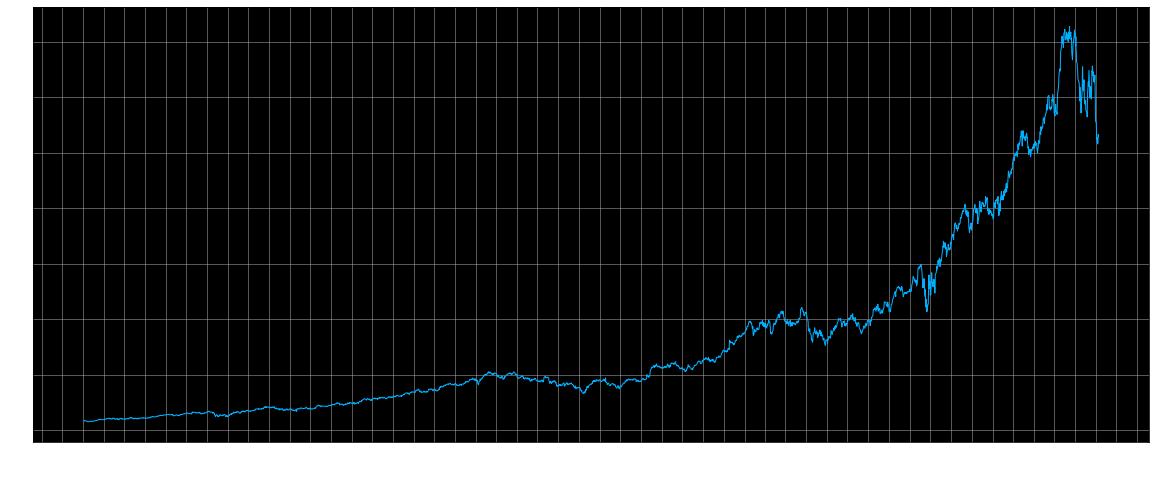

In [8]:
import matplotlib.dates as mdates
from datetime import datetime

def plot_adj_close(company_df, figure_size=(20, 8)):
    figure = plt.figure(figsize=figure_size)
    ax = plt.axes()
    ax.set_facecolor('black')
    ax.tick_params(axis='both', colors='white')
    ax.grid(True, linewidth=0.5)
    ax.xaxis.set_major_locator(mdates.MonthLocator((1, 4, 7, 10)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))
    plt.xticks(rotation=90)

    ax.plot(company_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')), company_df['Adj Close'], color=(0, 0.69, 1), linewidth=1)

company_df = random_10_companies[random_10_companies['Ticker'] == random_10_tickers.iloc[0]]
plot_adj_close(company_df)

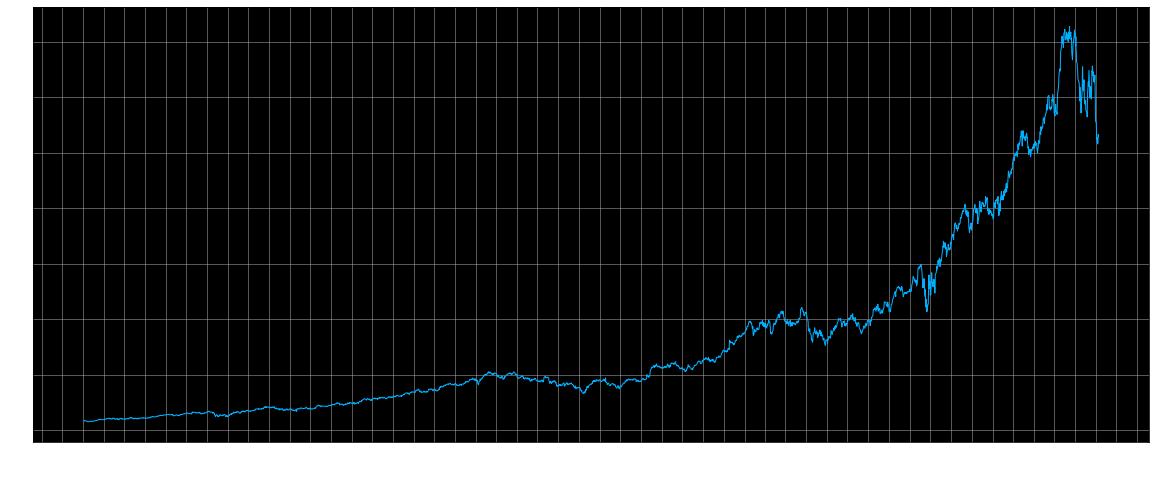

In [9]:
def plot_value_date(values, dates=None, dates_txt=None, figure=None, ax=None, figure_size=(20, 8), color=(0, 0.69, 1)):
    if dates is None and dates_txt is None:
        raise ValueError('Must specify dates or dates_txt')

    if (figure is None and ax is not None) or (figure is not None and ax is None):
        raise ValueError('Both figure and ax must be specified or not specified at the same time')

    if dates is None:
        dates = dates_txt.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

    if ax is None:
        figure = plt.figure(figsize=figure_size)
        ax = plt.axes()
        ax.set_facecolor('black')
        ax.tick_params(axis='both', colors='white')
        ax.grid(True, linewidth=0.5)
        ax.xaxis.set_major_locator(mdates.MonthLocator((1, 4, 7, 10)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%Y'))
        plt.xticks(rotation=90)

    ax.plot(dates, values, color=color, linewidth=1)
    return figure, ax

figure, ax = plot_value_date(company_df['Adj Close'], dates_txt=company_df['Date'])

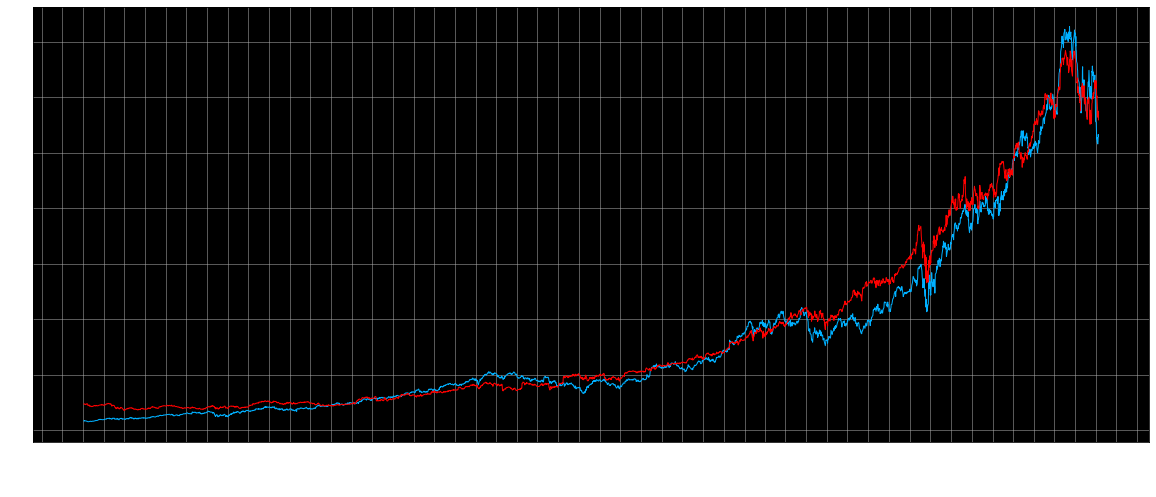

In [10]:
company2_df = random_10_companies[random_10_companies['Ticker'] == random_10_tickers.iloc[1]]
figure, ax = plot_value_date(company2_df['Adj Close'], dates_txt=company_df['Date'], figure=figure, ax=ax, color=(1, 0, 0))
figure

# Extract tickers

In [11]:
sp_500_value_df
tickers = pd.Series(quotes_df['Ticker'].unique()).to_list()
tickers

['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABMD',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF-B',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BLL',
 'BMY',
 'BR',
 'BRK-B',
 'BRO',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CERN',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSX',
 'CTAS',
 'CTLT',
 'CT

In [12]:
# https://datahub.io/core/s-and-p-500-companies-financials
sp_500_financials_df = pd.read_csv('data/constituents-financials_csv.csv')
sp_500_financials_df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [13]:
sp_500_financials_df[['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']].corr()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Price,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625,0.023637
Price/Earnings,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558,0.000366
Dividend Yield,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724,0.089369
Earnings/Share,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178,0.032254
52 Week Low,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823,0.023322
52 Week High,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721,0.017794
Market Cap,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249,0.034411
EBITDA,0.180321,0.002950,0.126133,0.180583,0.176277,0.179666,0.771344,1.000000,-0.037175,0.035547
Price/Sales,0.181625,0.188558,-0.077724,-0.036178,0.188823,0.173721,0.095249,-0.037175,1.000000,0.012337
Price/Book,0.023637,0.000366,0.089369,0.032254,0.023322,0.017794,0.034411,0.035547,0.012337,1.000000


In [14]:
from yahoofinancials import YahooFinancials

In [15]:
start_date = '2010-01-01'
end_date = '2020-01-01'

In [16]:
tech_stocks = ['AAPL', 'MSFT', 'INTC']
bank_stocks = ['WFC', 'BAC', 'C']

yahoo_financials_tech = YahooFinancials(tech_stocks)
yahoo_financials_banks = YahooFinancials(bank_stocks)

tech_cash_flow_data_an = yahoo_financials_tech.get_financial_stmts('annual', 'cash')
bank_cash_flow_data_an = yahoo_financials_banks.get_financial_stmts('annual', 'cash')

In [17]:
yahoo_financials_tech.get_financial_stmts('quarterly', 'income')

{'incomeStatementHistoryQuarterly': {'AAPL': [{'2023-06-30': {'basicAverageShares': 15697614000.0,
     'totalOperatingIncomeAsReported': 22998000000.0,
     'reconciledCostOfRevenue': 217117000000.0,
     'interestExpense': 3758000000.0,
     'netIncomeFromContinuingOperationNetMinorityInterest': 19881000000.0,
     'taxEffectOfUnusualItems': 0.0,
     'operatingIncome': 112226000000.0,
     'totalRevenue': 383933000000.0,
     'grossProfit': 166816000000.0,
     'netIncomeCommonStockholders': 94760000000.0,
     'otherIncomeExpense': -592000000.0,
     'reconciledDepreciation': 3052000000.0,
     'netIncome': 94760000000.0,
     'dilutedEPS': 1.26,
     'netIncomeFromContinuingAndDiscontinuedOperation': 94760000000.0,
     'normalizedEBITDA': 26050000000.0,
     'operatingRevenue': 81797000000.0,
     'netIncomeIncludingNoncontrollingInterests': 19881000000.0,
     'sellingGeneralAndAdministration': 5973000000.0,
     'basicEPS': 1.27,
     'otherNonOperatingIncomeExpenses': -2650000

In [18]:
APH = YahooFinancials(['APH'])

In [19]:
APH_finance = APH.get_financial_stmts('quarterly', ['income', 'balance', 'cash'])

In [20]:
APH_finance

{'incomeStatementHistoryQuarterly': {'APH': [{'2023-09-30': {'dilutedEPS': 0.83,
     'basicAverageShares': 595675000.0,
     'interestExpense': 33600000.0,
     'netIncomeFromContinuingAndDiscontinuedOperation': 513900000.0,
     'operatingRevenue': 12466400000.0,
     'netIncomeIncludingNoncontrollingInterests': 1937400000.0,
     'netIncome': 513900000.0,
     'netIncomeFromContinuingOperationNetMinorityInterest': 1921100000.0,
     'dilutedNIAvailtoComStockholders': 513900000.0,
     'totalUnusualItemsExcludingGoodwill': -22500000.0,
     'netNonOperatingInterestIncomeExpense': -141600000.0,
     'operatingExpense': 381600000.0,
     'normalizedEBITDA': 2985600000.0,
     'ebit': 667100000.0,
     'totalUnusualItems': -9000000.0,
     'restructuringAndMergernAcquisition': 9000000.0,
     'totalOperatingIncomeAsReported': 657900000.0,
     'taxEffectOfUnusualItems': -1638000.0,
     'reconciledCostOfRevenue': 8445200000.0,
     'dilutedAverageShares': 619950000.0,
     'specialIncom

In [21]:
APH.get_stock_price_data()

{'APH': {'maxAge': 1,
  'preMarketSource': 'FREE_REALTIME',
  'postMarketChangePercent': 0.0044593303,
  'postMarketChange': 0.400002,
  'postMarketTime': '2023-11-18 06:53:14 UTC+0000',
  'postMarketPrice': 90.1,
  'postMarketSource': 'FREE_REALTIME',
  'regularMarketChangePercent': 0.0016749699,
  'regularMarketChange': 0.149994,
  'regularMarketTime': '2023-11-18 03:00:02 UTC+0000',
  'priceHint': 2,
  'regularMarketPrice': 89.7,
  'regularMarketDayHigh': 90.0,
  'regularMarketDayLow': 89.42,
  'regularMarketVolume': 3198554,
  'regularMarketPreviousClose': 89.55,
  'regularMarketSource': 'FREE_REALTIME',
  'regularMarketOpen': 90.0,
  'exchange': 'NYQ',
  'exchangeName': 'NYSE',
  'exchangeDataDelayedBy': 0,
  'marketState': 'CLOSED',
  'quoteType': 'EQUITY',
  'symbol': 'APH',
  'underlyingSymbol': None,
  'shortName': 'Amphenol Corporation',
  'longName': 'Amphenol Corporation',
  'currency': 'USD',
  'quoteSourceName': 'Nasdaq Real Time Price',
  'currencySymbol': '$',
  'fromCu

In [22]:
APH_div = APH.get_daily_dividend_data(start_date, end_date)

In [23]:
APH_div

{'APH': [{'date': 1268659800,
   'formatted_date': '2010-03-15',
   'amount': 0.00375},
  {'date': 1276522200, 'formatted_date': '2010-06-14', 'amount': 0.00375},
  {'date': 1284384600, 'formatted_date': '2010-09-13', 'amount': 0.00375},
  {'date': 1292250600, 'formatted_date': '2010-12-13', 'amount': 0.00375},
  {'date': 1300109400, 'formatted_date': '2011-03-14', 'amount': 0.00375},
  {'date': 1307971800, 'formatted_date': '2011-06-13', 'amount': 0.00375},
  {'date': 1315834200, 'formatted_date': '2011-09-12', 'amount': 0.00375},
  {'date': 1323700200, 'formatted_date': '2011-12-12', 'amount': 0.00375},
  {'date': 1331559000, 'formatted_date': '2012-03-12', 'amount': 0.02625},
  {'date': 1339421400, 'formatted_date': '2012-06-11', 'amount': 0.02625},
  {'date': 1347283800, 'formatted_date': '2012-09-10', 'amount': 0.02625},
  {'date': 1355149800, 'formatted_date': '2012-12-10', 'amount': 0.02625},
  {'date': 1363008600, 'formatted_date': '2013-03-11', 'amount': 0.02625},
  {'date': 1